In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer, load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score

In [ ]:
# Helper function for decision boundary plotting
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=25, edgecolors='k')
    plt.title(title)
    plt.show()

In [ ]:
# Helper function for plotting accuracy bar chart
def plot_accuracy_bar_chart(accuracies, kernels, title):
    plt.figure(figsize=(8, 6))
    # Using a pastel colormap
    colors = plt.cm.Pastel1(np.linspace(0, 1, len(kernels)))
    bars = plt.bar(kernels, accuracies, color=colors)
    plt.ylim([0, 1])
    plt.ylabel('Accuracy')
    plt.title(title)

    # Add accuracy values on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment
    plt.show()


Kernel: linear
Accuracy: 0.901
Confusion Matrix:
 [[ 51  12]
 [  5 103]]


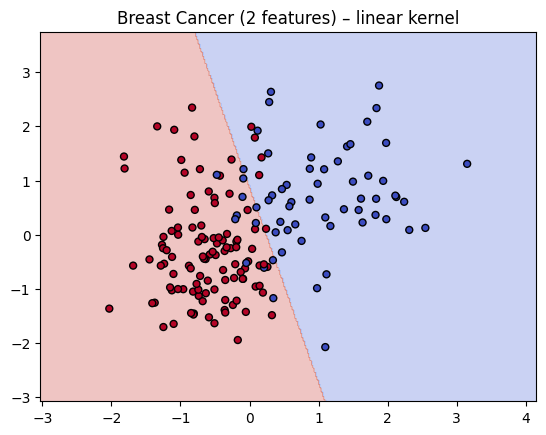


Kernel: poly
Accuracy: 0.83
Confusion Matrix:
 [[ 34  29]
 [  0 108]]


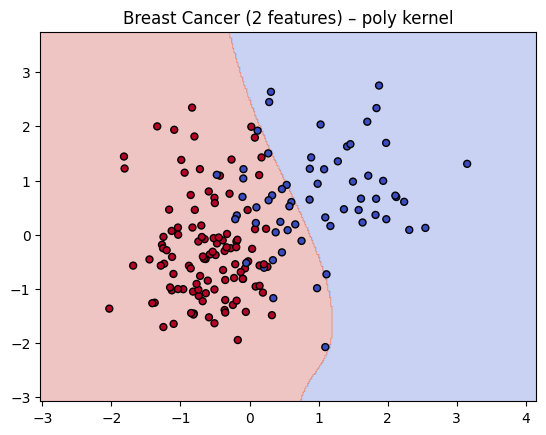


Kernel: rbf
Accuracy: 0.906
Confusion Matrix:
 [[ 52  11]
 [  5 103]]


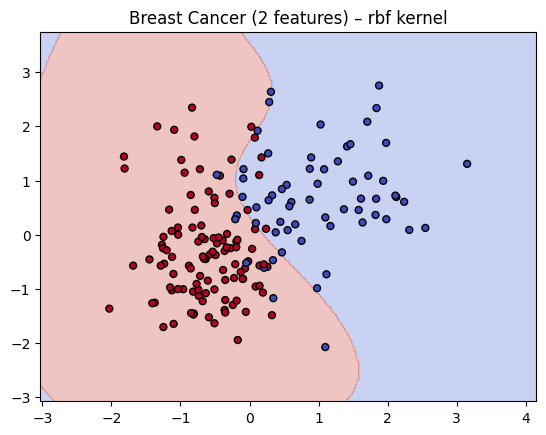


Kernel: sigmoid
Accuracy: 0.848
Confusion Matrix:
 [[52 11]
 [15 93]]


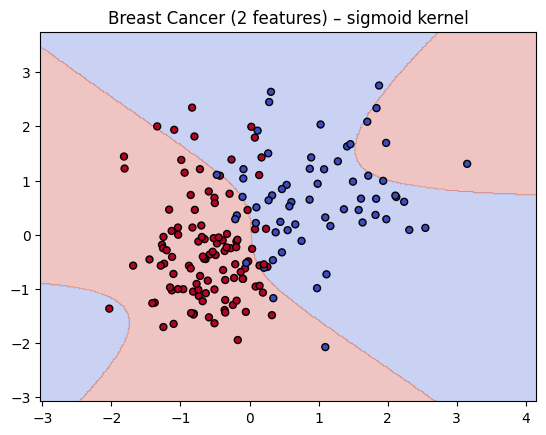

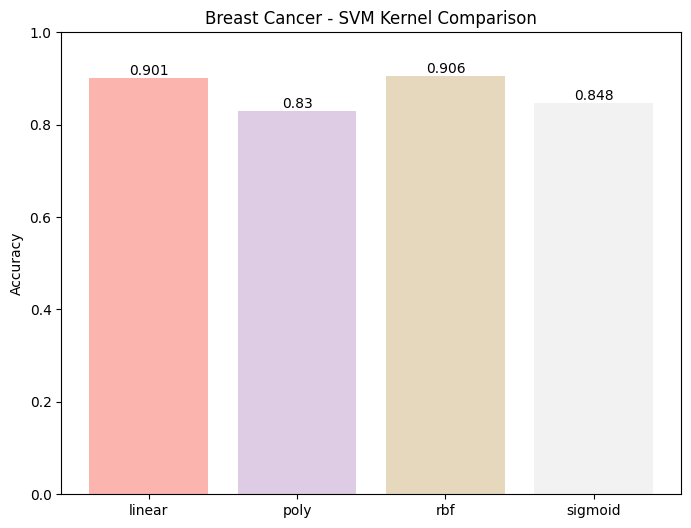

In [ ]:
# Load dataset
data = load_breast_cancer()
# Selecting 2 most important features: mean radius and mean texture
X, y = data.data[:, :2], data.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train and evaluate SVM with multiple kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    model = SVC(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", cm)

    # Plot decision boundary using only first 2 features
    plot_decision_boundary(model, X_test[:, :2], y_test, f"Breast Cancer (2 features) – {kernel} kernel")

# Plot accuracy bar chart
plot_accuracy_bar_chart(accuracies, kernels, "Breast Cancer - SVM Kernel Comparison")


 make_moons Dataset (Classification) 

Kernel: linear
Accuracy: 0.878
Confusion Matrix:
 [[33  5]
 [ 6 46]]


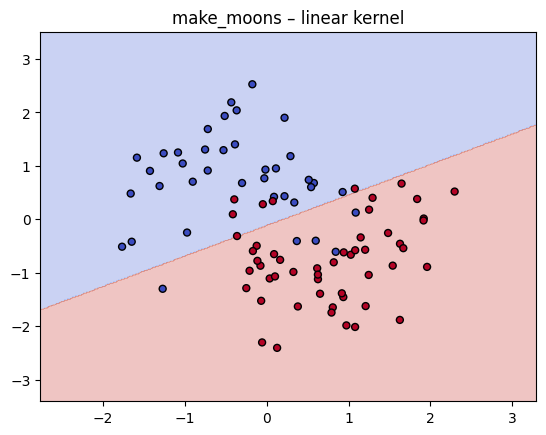


Kernel: poly
Accuracy: 0.889
Confusion Matrix:
 [[33  5]
 [ 5 47]]


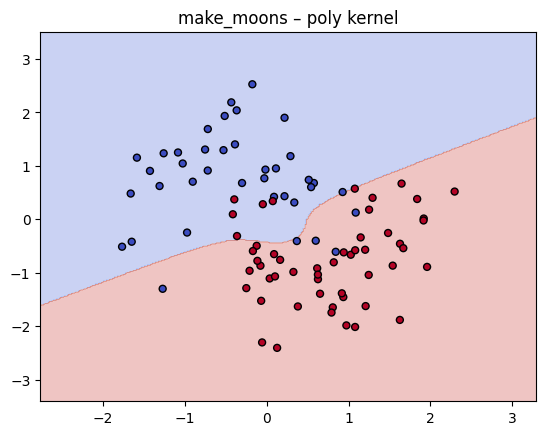


Kernel: rbf
Accuracy: 0.9
Confusion Matrix:
 [[33  5]
 [ 4 48]]


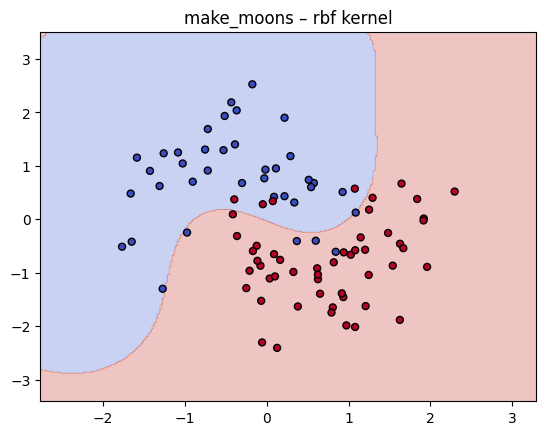


Kernel: sigmoid
Accuracy: 0.767
Confusion Matrix:
 [[27 11]
 [10 42]]


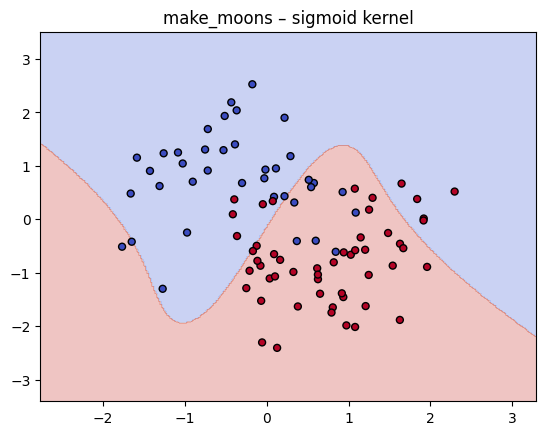

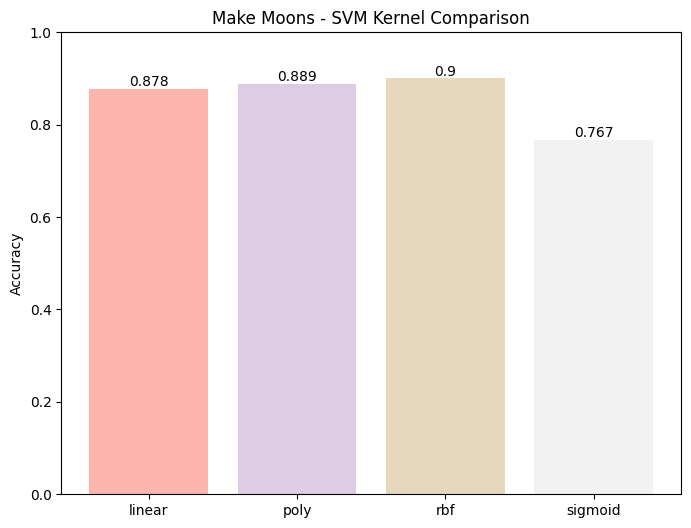

In [ ]:
# Non-Linear Dataset
print("\n make_moons Dataset (Classification) ")

# Generate dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    model = SVC(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", cm)

    plot_decision_boundary(model, X_test, y_test, f"make_moons – {kernel} kernel")

# Plot accuracy bar chart
plot_accuracy_bar_chart(accuracies, kernels, "Make Moons - SVM Kernel Comparison")


 Digits Dataset (Classification, 5 classes only: 0–4) 

Kernel: linear
Accuracy: 0.882
Confusion Matrix:
 [[72  0  0  1  2]
 [ 0 49  0  1  2]
 [ 0  4 28  9  0]
 [ 0  0 10 42  0]
 [ 0  3  0  0 48]]


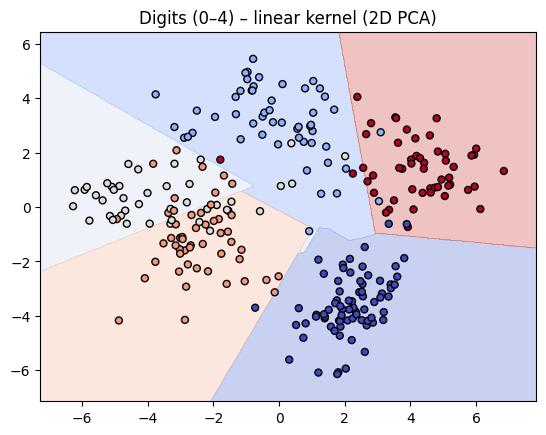


Kernel: poly
Accuracy: 0.867
Confusion Matrix:
 [[71  0  0  2  2]
 [ 0 46  0  4  2]
 [ 0  2 28 11  0]
 [ 0  0  7 45  0]
 [ 0  6  0  0 45]]


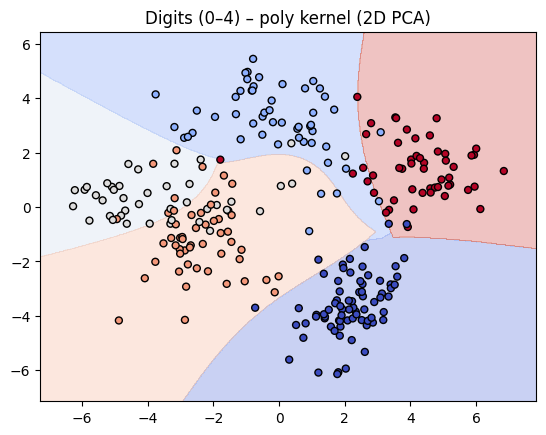


Kernel: rbf
Accuracy: 0.886
Confusion Matrix:
 [[72  0  0  1  2]
 [ 0 50  0  0  2]
 [ 0  4 28  9  0]
 [ 1  0 10 41  0]
 [ 0  1  1  0 49]]


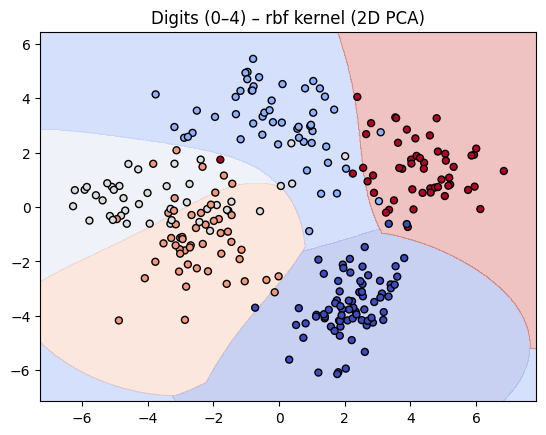


Kernel: sigmoid
Accuracy: 0.745
Confusion Matrix:
 [[70  0  0  0  5]
 [ 1 40  6  0  5]
 [ 0  3 18 19  1]
 [ 3  2 19 28  0]
 [ 0  5  0  0 46]]


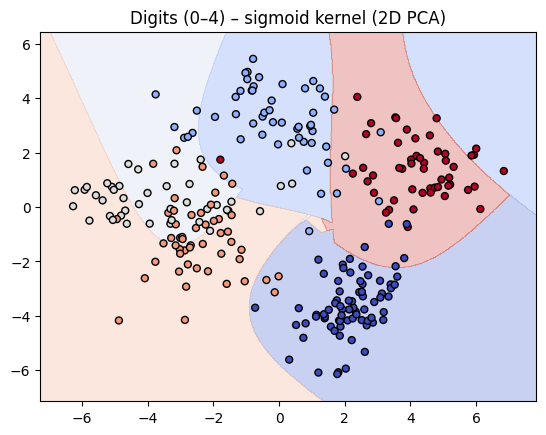

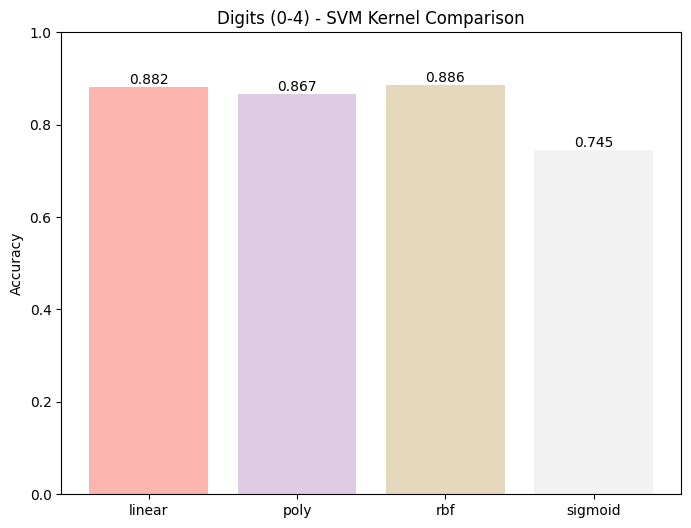

In [ ]:
# MNIST Dataset
print("\n Digits Dataset (Classification, 5 classes only: 0–4) ")

# Load digits
digits = load_digits()
X, y = digits.data, digits.target

# Filter to only 0–4
mask = y < 5
X, y = X[mask], y[mask]

# PCA to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))

# Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies = []
for kernel in kernels:
    model = SVC(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(acc)
    print(f"\nKernel: {kernel}")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", cm)

    plot_decision_boundary(model, X_test, y_test, f"Digits (0–4) – {kernel} kernel (2D PCA)")

# Plot accuracy bar chart
plot_accuracy_bar_chart(accuracies, kernels, "Digits (0-4) - SVM Kernel Comparison")

Regressor

In [ ]:
# Imports
from sklearn.svm import SVR
from sklearn.datasets import load_breast_cancer, load_digits, make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
# Helper function for decision boundary (2D)
def plot_decision_boundary_svr(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm, s=25, edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# List of kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store MSE scores for bar chart
#mse_scores = {"Breast Cancer": [], "make_moons": [], "Digits (0-4)": []}

In [ ]:
def plot_mse_bar_chart(mse_scores, kernels, title):
    plt.figure(figsize=(6,4))  # shorter height
    colors = plt.cm.Pastel2.colors[:len(kernels)]
    bars = plt.bar(kernels, mse_scores, color=colors, width=0.5)

    # plt.ylim(0, 1)  # fixed 0-1 for R², not suitable for MSE
    plt.ylabel("Mean Squared Error")
    plt.title(title)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval,3),
                 va='bottom', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#mse_scores = {"Breast Cancer": [], "make_moons": [], "Digits (0-4)": []}


 Breast Cancer Dataset (Regression) 

Kernel: linear
Mean Squared Error: 0.091


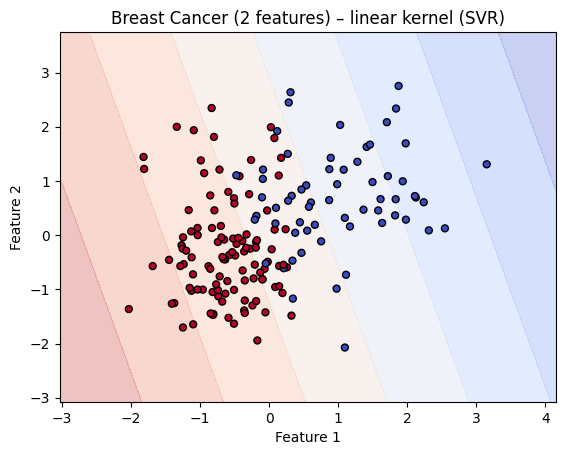


Kernel: poly
Mean Squared Error: 0.211


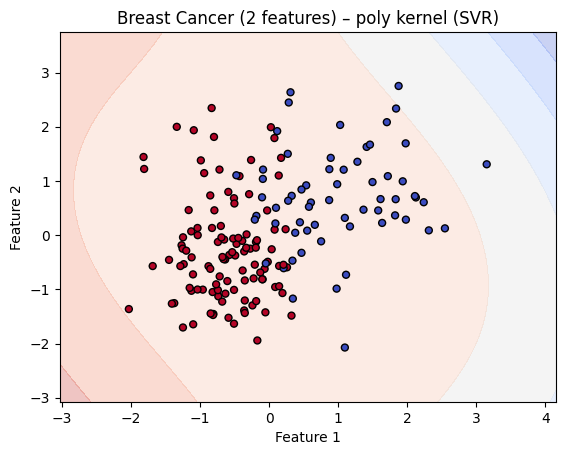


Kernel: rbf
Mean Squared Error: 0.068


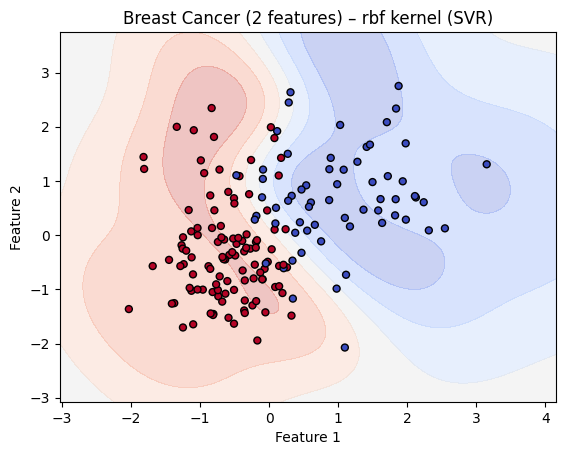


Kernel: sigmoid
Mean Squared Error: 214.698


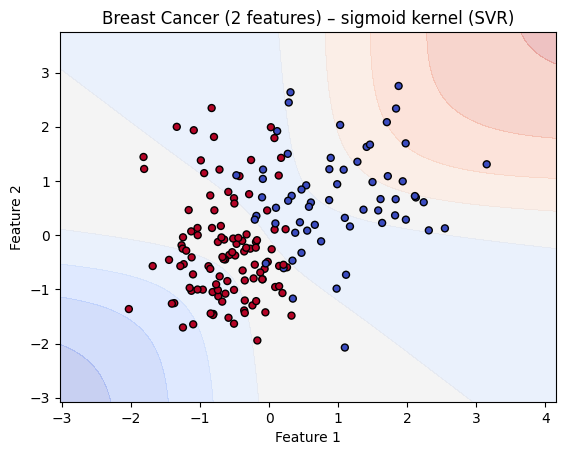

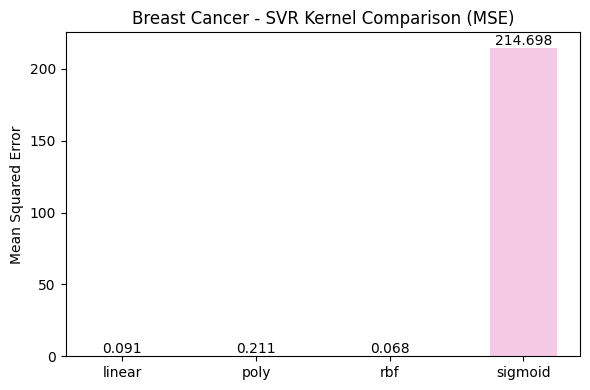

In [ ]:
# Breast Cancer Dataset (Regression)
print("\n Breast Cancer Dataset (Regression) ")

# Load dataset
data = load_breast_cancer()
X, y = data.data[:, :2], data.target # Using first 2 features as before

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Clear mse_scores for Breast Cancer before appending
#mse_scores["Breast Cancer"] = []
mse_scores = []

for kernel in kernels:
    model = SVR(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metric (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"\nKernel: {kernel}")
    print("Mean Squared Error:", round(mse, 3))

    # Plot decision boundary (using only first 2 features)
    plot_decision_boundary_svr(model, X_test[:, :2], y_test, f"Breast Cancer (2 features) – {kernel} kernel (SVR)")

# Plot MSE bar chart for Breast Cancer
plot_mse_bar_chart(mse_scores, kernels, "Breast Cancer - SVR Kernel Comparison (MSE)")


 make_moons Dataset (Regression) 

Kernel: linear
Mean Squared Error: 0.097


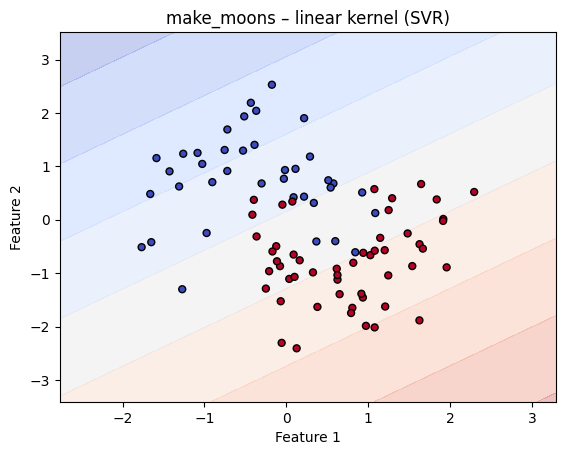


Kernel: poly
Mean Squared Error: 0.169


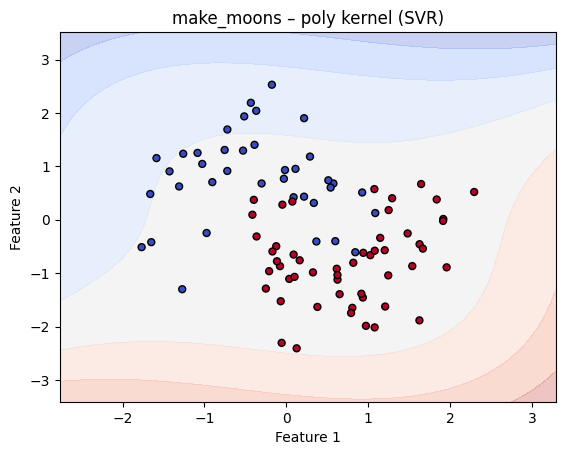


Kernel: rbf
Mean Squared Error: 0.055


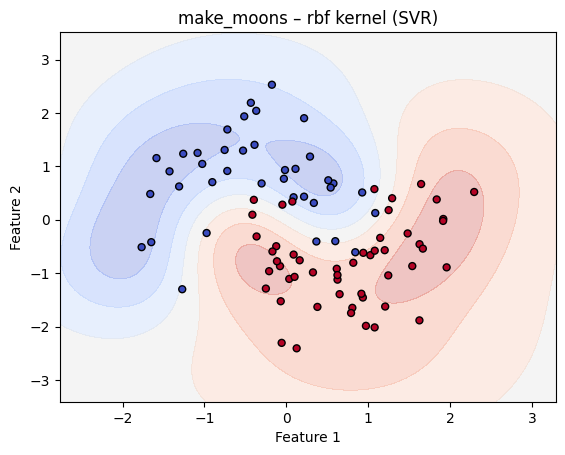


Kernel: sigmoid
Mean Squared Error: 35.859


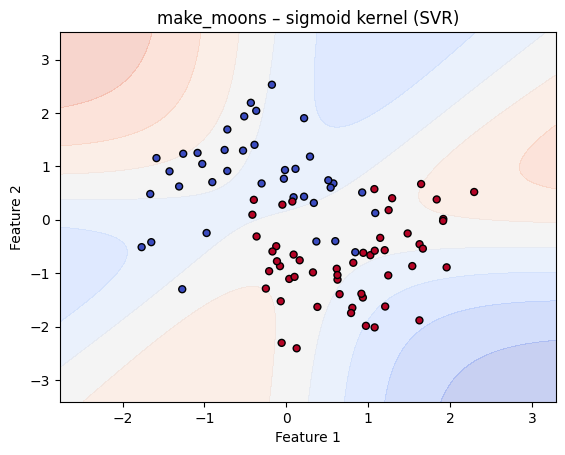

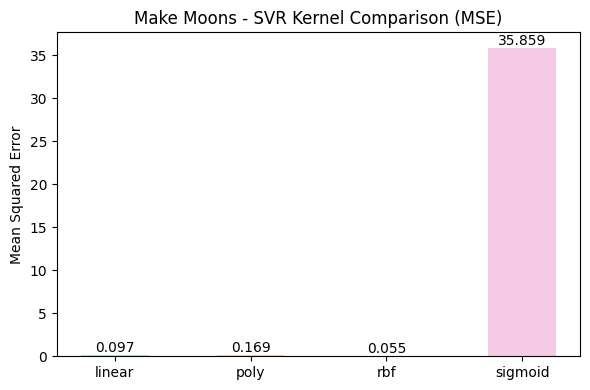

In [ ]:
# make_moons Dataset (Regression)
print("\n make_moons Dataset (Regression) ")

# Generate dataset (using the same data as classification, but treating it as regression)
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Split & scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Clear mse_scores for make_moons before appending
mse_scores= []

for kernel in kernels:
    model = SVR(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metric (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"\nKernel: {kernel}")
    print("Mean Squared Error:", round(mse, 3))

    plot_decision_boundary_svr(model, X_test, y_test, f"make_moons – {kernel} kernel (SVR)")

# Plot MSE bar chart for make_moons
plot_mse_bar_chart(mse_scores, kernels, "Make Moons - SVR Kernel Comparison (MSE)")


 Digits Dataset (Regression, 5 classes only: 0–4) 

Kernel: linear
Mean Squared Error: 2.591


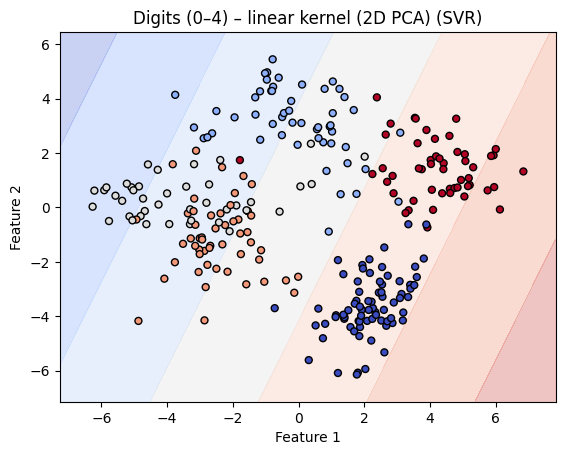


Kernel: poly
Mean Squared Error: 1.487


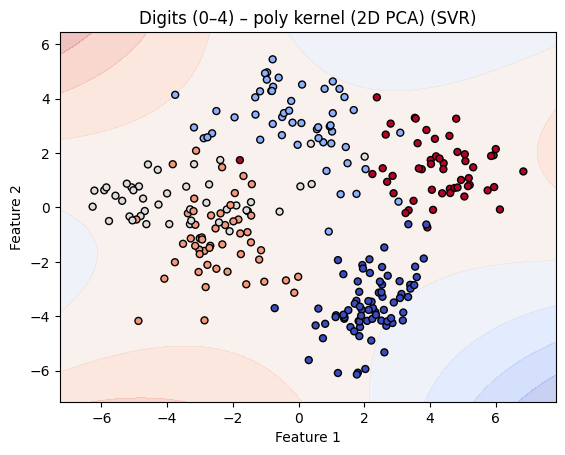


Kernel: rbf
Mean Squared Error: 0.33


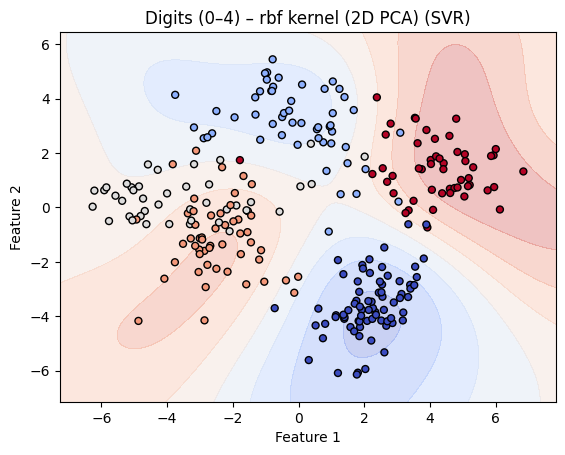


Kernel: sigmoid
Mean Squared Error: 303.206


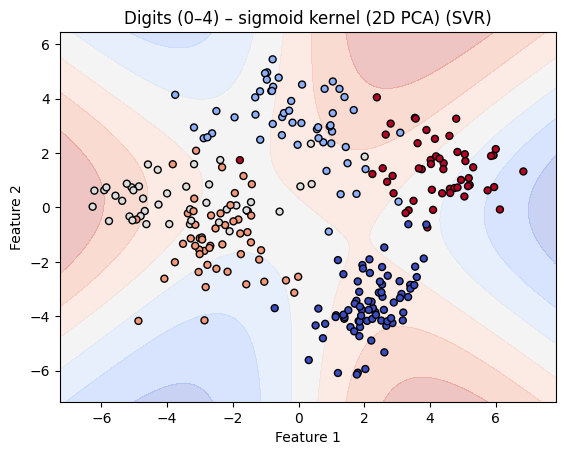

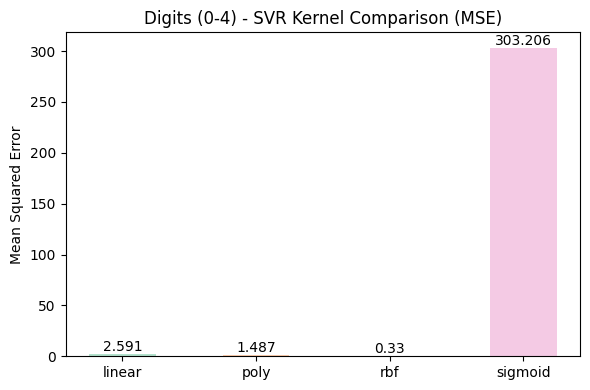

In [ ]:
# Digits Dataset (Regression, 5 classes only: 0–4)
print("\n Digits Dataset (Regression, 5 classes only: 0–4) ")

# Load digits
digits = load_digits()
X, y = digits.data, digits.target

# Filter to only 0–4
mask = y < 5
X, y = X[mask], y[mask]

# PCA to 2D for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(StandardScaler().fit_transform(X))

# Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Clear mse_scores for Digits before appending
mse_scores = []

for kernel in kernels:
    model = SVR(kernel=kernel, gamma='scale')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation metric (MSE)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"\nKernel: {kernel}")
    print("Mean Squared Error:", round(mse, 3))

    plot_decision_boundary_svr(model, X_test, y_test, f"Digits (0–4) – {kernel} kernel (2D PCA) (SVR)")

# Plot MSE bar chart for Digits
plot_mse_bar_chart(mse_scores, kernels, "Digits (0-4) - SVR Kernel Comparison (MSE)")